# Project: Investigate a Dataset - European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
in this data we have about 25,000 matches in 11 european league, with there lineup goals and even with the bet results in many website of betting, we have all player names and all there attributes over years, this data give us a sight at all european football from 2008 to 2018, our goal is to get the corralition between attributes of player and team, and try to know what's the league that is worth to whatch according to its numbers.

### Question(s) for Analysis
1. what teams and leagues have the most unpredictable matches?

2. what leagues have the most goals over years?

3. what are the most important attributes to every player?

#### 1. we need first to import all libiraries we want and data we use

In [1]:
## we need to use pandas and matplotlib to analyize this data, and sqlite3 to extrate it from database
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


after getting wanted libiraries, we now want to get data from database and put it into dataframe to start our analysis

In [2]:
## we now need to get our data from database 
address= r"database.sqlite"
connection = sqlite3.connect(address)

In [3]:
matches = pd.read_sql("""SELECT season,
                                date,
                                country_id, 
                                league_id,
                                home_team_api_id,
                                away_team_api_id,
                                home_team_goal,
                                away_team_goal,
                                B365H,
                                B365D,
                                B365A,
                                BWH,
                                BWD,
                                BWA                                    
                                    FROM Match""",connection)

we now get the main table we will use in this analysis, but we want to remove id columns from it and put names to make it easier to read.

In [4]:
matches.head()

,season,date,country_id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA
0,2008/2009,2008-08-17 00:00:00,1,1,9987,9993,1,1,1.73,3.40,5.00,1.75,3.35,4.20
1,2008/2009,2008-08-16 00:00:00,1,1,10000,9994,0,0,1.95,3.20,3.60,1.80,3.30,3.95
2,2008/2009,2008-08-16 00:00:00,1,1,9984,8635,0,3,2.38,3.30,2.75,2.40,3.30,2.55
3,2008/2009,2008-08-17 00:00:00,1,1,9991,9998,5,0,1.44,3.75,7.50,1.40,4.00,6.80
4,2008/2009,2008-08-16 00:00:00,1,1,7947,9985,1,3,5.00,3.50,1.65,5.00,3.50,1.60


in database, names are in two tables so we need to get them and then merge with main table to be ready.

In [5]:
leagues = pd.read_sql("""SELECT * FROM League""",connection)
teams=pd.read_sql("""SELECT team_api_id,team_long_name FROM Team""",connection)

In [6]:
teams.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


in the other part of this analysis we would use player attributes table to know its relations.

In [7]:
attributes=pd.read_sql("""SELECT * FROM Player_Attributes""",connection)

In [8]:
attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


<a id='wrangling'></a>
## Data Wrangling

### General Properties
we need to check missing values and if we need to merge two tables together, and check duplications in the data

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            25979 non-null  object 
 1   date              25979 non-null  object 
 2   country_id        25979 non-null  int64  
 3   league_id         25979 non-null  int64  
 4   home_team_api_id  25979 non-null  int64  
 5   away_team_api_id  25979 non-null  int64  
 6   home_team_goal    25979 non-null  int64  
 7   away_team_goal    25979 non-null  int64  
 8   B365H             22592 non-null  float64
 9   B365D             22592 non-null  float64
 10  B365A             22592 non-null  float64
 11  BWH               22575 non-null  float64
 12  BWD               22575 non-null  float64
 13  BWA               22575 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 2.8+ MB


so we have some missing values to remove but all data types are correct, only date column has wrong data type, but we will remove it becouse we didn't need to use it.

we now need to merge multiple tables to get teams name and league correct instead of just id

In [10]:
## now we adding league name to matches table -the main table to us-
matches=matches.merge(leagues,left_on='league_id',right_on='id',how='left')

In [11]:
## now we adding the correct name of teams (home and away) and change all columns name we want
matches=matches.merge(teams,left_on='home_team_api_id',right_on='team_api_id',how='left')
matches.rename(columns={'team_long_name':'home_team'},inplace=True)
matches=matches.merge(teams,left_on='away_team_api_id',right_on='team_api_id',how='left')
matches.rename(columns={'team_long_name':'away_team'},inplace=True)

In [12]:
matches.head()

,season,date,country_id_x,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,...,BWH,BWD,BWA,id,country_id_y,name,team_api_id_x,home_team,team_api_id_y,away_team
0,2008/2009,2008-08-17 00:00:00,1,1,9987,9993,1,1,1.73,3.40,...,1.75,3.35,4.20,1,1,Belgium Jupiler League,9987,KRC Genk,9993,Beerschot AC
1,2008/2009,2008-08-16 00:00:00,1,1,10000,9994,0,0,1.95,3.20,...,1.80,3.30,3.95,1,1,Belgium Jupiler League,10000,SV Zulte-Waregem,9994,Sporting Lokeren
2,2008/2009,2008-08-16 00:00:00,1,1,9984,8635,0,3,2.38,3.30,...,2.40,3.30,2.55,1,1,Belgium Jupiler League,9984,KSV Cercle Brugge,8635,RSC Anderlecht
3,2008/2009,2008-08-17 00:00:00,1,1,9991,9998,5,0,1.44,3.75,...,1.40,4.00,6.80,1,1,Belgium Jupiler League,9991,KAA Gent,9998,RAEC Mons
4,2008/2009,2008-08-16 00:00:00,1,1,7947,9985,1,3,5.00,3.50,...,5.00,3.50,1.60,1,1,Belgium Jupiler League,7947,FCV Dender EH,9985,Standard de Liège


In [13]:
## now we drop all columns name of id 
matches.drop(columns=['home_team_api_id','away_team_api_id','league_id','country_id_x','country_id_y','team_api_id_x','team_api_id_y','id'],inplace=True)

In [14]:
matches.rename(columns={"name":"league_name"},inplace=True)

In [15]:
matches.head()

,season,date,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,league_name,home_team,away_team
0,2008/2009,2008-08-17 00:00:00,1,1,1.73,3.40,5.00,1.75,3.35,4.20,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2008/2009,2008-08-16 00:00:00,0,0,1.95,3.20,3.60,1.80,3.30,3.95,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,2008/2009,2008-08-16 00:00:00,0,3,2.38,3.30,2.75,2.40,3.30,2.55,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,2008/2009,2008-08-17 00:00:00,5,0,1.44,3.75,7.50,1.40,4.00,6.80,Belgium Jupiler League,KAA Gent,RAEC Mons
4,2008/2009,2008-08-16 00:00:00,1,3,5.00,3.50,1.65,5.00,3.50,1.60,Belgium Jupiler League,FCV Dender EH,Standard de Liège


and now we have a clean table, but we need to drop all missing values and duplicated to make it cleaner

In [16]:
matches.dropna(inplace=True)

In [17]:
## checking duplicated columns
matches.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

#### getting correlation first before answer main questions.

In [18]:
matches.describe()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA
count,22572.000000,22572.000000,22572.000000,22572.000000,22572.000000,22572.000000,22572.000000,22572.000000
mean,1.549619,1.165914,2.628772,3.840675,4.661619,2.559328,3.747723,4.396720
std,1.301166,1.146904,1.795005,1.117687,3.731327,1.638071,1.033463,3.292378
min,0.000000,0.000000,1.040000,1.530000,1.080000,1.030000,1.650000,1.100000
25%,1.000000,0.000000,1.670000,3.300000,2.500000,1.650000,3.200000,2.500000
50%,1.000000,1.000000,2.100000,3.500000,3.500000,2.100000,3.400000,3.400000
75%,2.000000,2.000000,2.800000,4.000000,5.250000,2.750000,3.800000,5.000000
max,10.000000,9.000000,26.000000,17.000000,51.000000,34.000000,19.500000,51.000000


from this numbers only we have two insights, first, home teams score more than away team in average, but it doesn't mean that home always wins, second, in average the mean of away team winning is higher than home winning or drawing, but we need to get this statictics to english and spanish league cause these two are the most powerful league.

In [19]:
matches[(matches['league_name']=='England Premier League')|(matches['league_name']=='Spain LIGA BBVA')].describe()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA
count,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000
mean,1.590819,1.147252,2.732279,4.056310,5.067555,2.652741,3.937266,4.737799
std,1.350855,1.152742,2.117225,1.459793,4.625689,1.951413,1.335359,4.079263
min,0.000000,0.000000,1.040000,2.500000,1.080000,1.030000,2.400000,1.100000
25%,1.000000,0.000000,1.670000,3.300000,2.550000,1.650000,3.250000,2.500000
50%,1.000000,1.000000,2.100000,3.500000,3.600000,2.100000,3.400000,3.500000
75%,2.000000,2.000000,2.800000,4.200000,5.500000,2.750000,4.000000,5.250000
max,10.000000,8.000000,26.000000,17.000000,41.000000,34.000000,19.500000,51.000000


and it has increasing in predicting away team to win.

we need now to get the destribution of goals scored in each match

,home_team_goal,away_team_goal
count,22572.000000,22572.000000
mean,1.549619,1.165914
std,1.301166,1.146904
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


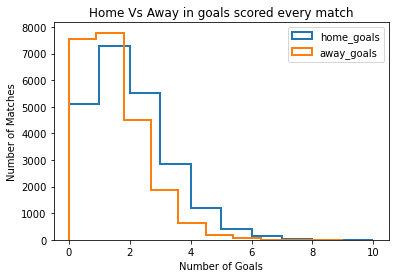

In [20]:
plt.hist(x='home_team_goal',data=matches,label='home_goals',histtype='step',linewidth=2.0)
plt.hist(x='away_team_goal',data=matches,label='away_goals',histtype='step',linewidth=2.0)
plt.xlabel("Number of Goals")
plt.ylabel("Number of Matches")
plt.title('Home Vs Away in goals scored every match')
plt.legend()
matches[['home_team_goal','away_team_goal']].describe()

and we can see clearly that crowd and home stdium affect.

array([[<AxesSubplot:title={'center':'home_team_goal'}>,
        <AxesSubplot:title={'center':'away_team_goal'}>,
        <AxesSubplot:title={'center':'B365H'}>],
       [<AxesSubplot:title={'center':'B365D'}>,
        <AxesSubplot:title={'center':'B365A'}>,
        <AxesSubplot:title={'center':'BWH'}>],
       [<AxesSubplot:title={'center':'BWD'}>,
        <AxesSubplot:title={'center':'BWA'}>, <AxesSubplot:>]],
      dtype=object)

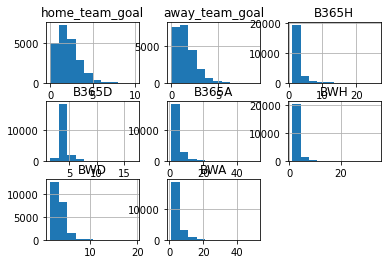

In [21]:
matches.hist()

### 1. what teams and leagues have the most unpredictable matches?

in this step we want to calculate match result (win,draw,loss) and compare it with predictions, so we need to apply a functions that take the goals and say who wins, and other function that's take predictions and get the final prediction.

In [22]:
def result (row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1
    if row['home_team_goal'] == row['away_team_goal']:
        return 2
    if row['home_team_goal'] < row['away_team_goal']:
        return 0

In [23]:
matches['game_result']=matches.apply (result, axis=1)

In [24]:
def predict(row, home, away, draw):
    if row[home] < row[draw] and row[home] < row[away]:
        return 1
    if row[away] < row[draw] and row[away] < row[home]:
        return 0
    else:
        return 2

In [25]:
matches['B365_result']=matches.apply (lambda row: predict(row,'B365H','B365A','B365D'), axis=1)

In [26]:
matches['BW_result']=matches.apply (lambda row: predict(row,'BWH','BWA','BWD'), axis=1)

In [27]:
matches.head()

,season,date,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,league_name,home_team,away_team,game_result,B365_result,BW_result
0,2008/2009,2008-08-17 00:00:00,1,1,1.73,3.40,5.00,1.75,3.35,4.20,Belgium Jupiler League,KRC Genk,Beerschot AC,2,1,1
1,2008/2009,2008-08-16 00:00:00,0,0,1.95,3.20,3.60,1.80,3.30,3.95,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2,1,1
2,2008/2009,2008-08-16 00:00:00,0,3,2.38,3.30,2.75,2.40,3.30,2.55,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,0,1,1
3,2008/2009,2008-08-17 00:00:00,5,0,1.44,3.75,7.50,1.40,4.00,6.80,Belgium Jupiler League,KAA Gent,RAEC Mons,1,1,1
4,2008/2009,2008-08-16 00:00:00,1,3,5.00,3.50,1.65,5.00,3.50,1.60,Belgium Jupiler League,FCV Dender EH,Standard de Liège,0,0,0


we need to transfare results columns to category to be able to use describe() easly

In [28]:
matches[['game_result','B365_result','BW_result']]=matches[['game_result','B365_result','BW_result']].astype('category')
matches[['game_result','B365_result','BW_result']].describe()

,game_result,B365_result,BW_result
count,22572,22572,22572
unique,3,3,3
top,1,1,1
freq,10364,16223,16144


and now less than half of all matches end with home win

In [29]:
## we now get only rows where bet 365 and BW have the same prediction
agreed_predictions=matches[matches['B365_result']==matches['BW_result']]

In [30]:
## now we get all worng predictions to know that is the most unpredicted team and league
wrong_predictions=agreed_predictions[agreed_predictions['B365_result']!=agreed_predictions['game_result']]

In [31]:
## get all home teams name of wrong prediction
home_wrong_predict=pd.DataFrame(wrong_predictions['home_team'].value_counts(ascending=False).reset_index().values,columns=["team", "number_of_matches"])

In [32]:
## and now we get all away teams
away_wrong_predict=pd.DataFrame(wrong_predictions['away_team'].value_counts(ascending=False).reset_index().values,columns=["team", "number_of_matches"])

In [33]:
## so now we can add them to know what's is the most unpredictable team
unexpected_teams=home_wrong_predict.merge(away_wrong_predict,on='team')
unexpected_teams['total_matches']=unexpected_teams['number_of_matches_x']+unexpected_teams['number_of_matches_y']
unexpected_teams.drop(columns=['number_of_matches_x','number_of_matches_y'],inplace=True)

In [34]:
unexpected_teams.head()

,team,total_matches
0,Stoke City,152
1,Sunderland,159
2,Hamburger SV,150
3,Stade Rennais FC,161
4,St. Mirren,139


In [35]:
## now we get all league matches
unexpected_league=wrong_predictions.league_name.value_counts(ascending=False)

In [36]:
unexpected_league

France Ligue 1              1449
England Premier League      1389
Italy Serie A               1356
Spain LIGA BBVA             1299
Germany 1. Bundesliga       1155
Netherlands Eredivisie      1034
Portugal Liga ZON Sagres     893
Scotland Premier League      845
Belgium Jupiler League       769
Name: league_name, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'France Ligue 1'),
  Text(1, 0, 'England Premier League'),
  Text(2, 0, 'Italy Serie A'),
  Text(3, 0, 'Spain LIGA BBVA'),
  Text(4, 0, 'Germany 1. Bundesliga'),
  Text(5, 0, 'Netherlands Eredivisie'),
  Text(6, 0, 'Portugal Liga ZON Sagres'),
  Text(7, 0, 'Scotland Premier League'),
  Text(8, 0, 'Belgium Jupiler League')])

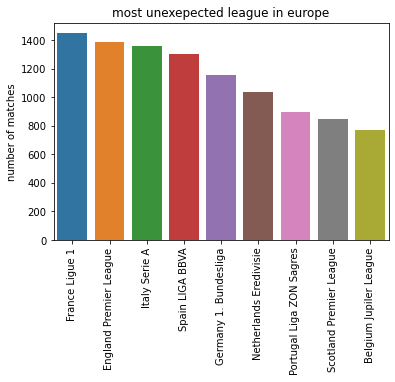

In [37]:
sns.barplot(x=unexpected_league.index,y=unexpected_league)
plt.title("most unexepected league in europe")
plt.ylabel("number of matches")
plt.xticks(rotation=90)

in this plot, France and english leagues have the most unpredictable matches.

In [38]:
unexpected_teams.iloc[:15]

,team,total_matches
0,Stoke City,152
1,Sunderland,159
2,Hamburger SV,150
3,Stade Rennais FC,161
4,St. Mirren,139
5,Toulouse FC,159
6,FC Lorient,151
7,Chievo Verona,148
8,Aston Villa,146
9,Getafe CF,139


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Stade Rennais FC'),
  Text(1, 0, 'Sunderland'),
  Text(2, 0, 'Toulouse FC'),
  Text(3, 0, 'Everton'),
  Text(4, 0, 'Stoke City'),
  Text(5, 0, 'FC Lorient'),
  Text(6, 0, 'Hamburger SV'),
  Text(7, 0, 'Kilmarnock'),
  Text(8, 0, 'Chievo Verona'),
  Text(9, 0, 'Aberdeen'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'TSG 1899 Hoffenheim'),
  Text(12, 0, 'St. Mirren'),
  Text(13, 0, 'Getafe CF'),
  Text(14, 0, 'RCD Espanyol')])

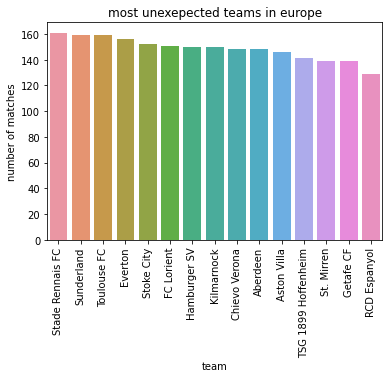

In [39]:
sns.barplot(data=unexpected_teams.iloc[:15].sort_values(by='total_matches',ascending=False),x='team',y='total_matches')
plt.title("most unexepected teams in europe")
plt.ylabel("number of matches")
plt.xticks(rotation=90)

### 2.what leagues have the most goals over years?

In [40]:
matches['total_goals']=matches['home_team_goal']+matches['away_team_goal']
grouped=matches.groupby(['season','league_name'])

In [41]:
total_goals=pd.DataFrame(grouped['total_goals'].sum().reset_index().values,columns=["season", "league",'goals'])

Text(0.5, 1.0, 'Goals in every season in top 5 european league')

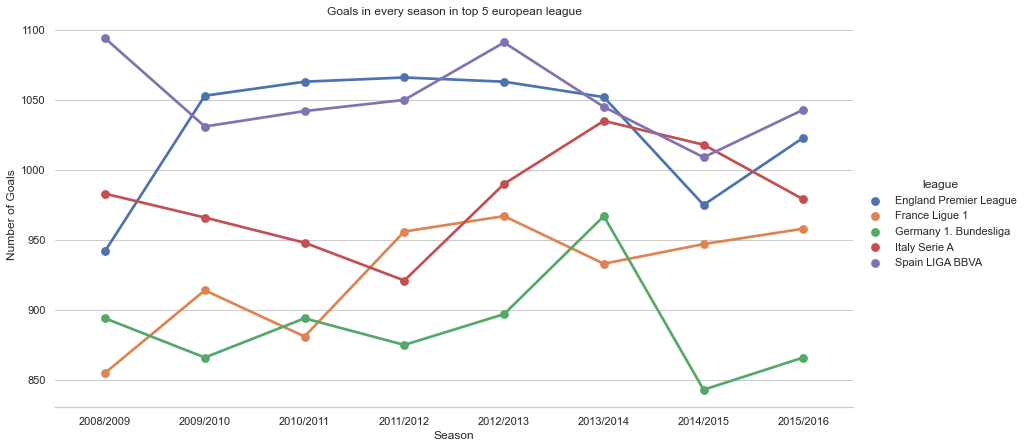

In [42]:
sns.set_theme(style="whitegrid")
top_leagues=['Spain LIGA BBVA','England Premier League','Italy Serie A','France Ligue 1','Germany 1. Bundesliga']
sns.catplot(data=total_goals[total_goals['league'].isin(top_leagues)],x='season',y='goals',hue='league',capsize=.2, height=6,aspect=2,
                kind="point")
sns.despine(left=True)
plt.ylabel("Number of Goals")
plt.xlabel("Season")
plt.title("Goals in every season in top 5 european league")

in average season, english and spanish league have the most goal scored in the season.

### 3. we want to know what attributes are most important in overall rating?

if we want to answer that we need to get the player attributes table from database.

In [43]:
## now we would check for any missing values or duplicated one
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [44]:
## we have a small amount of missing values so we will remove it
attributes.dropna(inplace=True)
attributes.duplicated().sum()

0

we now have a data set with no missing values and duplicated columns

In [45]:
attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,91995.886274,166822.125803,137653.145514,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,53092.657914,52821.443279,137599.735284,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,46074.250000,156616.000000,35451.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,92003.500000,183792.000000,80291.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,137935.750000,200138.000000,192841.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [46]:
## we need to remove all columns of id and dates, becouse it not important in this question.
attributes.drop(columns=['id','player_fifa_api_id','player_api_id','date'],inplace=True)

In [47]:
attributes.corr()['overall_rating']

overall_rating        1.000000
potential             0.765435
crossing              0.357320
finishing             0.330079
heading_accuracy      0.313324
short_passing         0.458243
volleys               0.361739
dribbling             0.354191
curve                 0.357566
free_kick_accuracy    0.349800
long_passing          0.434525
ball_control          0.443991
acceleration          0.243998
sprint_speed          0.253048
agility               0.239963
reactions             0.771856
balance               0.160211
shot_power            0.428053
jumping               0.258978
stamina               0.325606
strength              0.315684
long_shots            0.392668
aggression            0.322782
interceptions         0.249094
positioning           0.368978
vision                0.431493
penalties             0.392715
marking               0.132185
standing_tackle       0.163986
sliding_tackle        0.128054
gk_diving             0.027675
gk_handling           0.006717
gk_kicki

In [48]:
## now we can create a data frame with correlation and attribute name
corr_attribute=pd.DataFrame(attributes.corr()['overall_rating'].reset_index().values,columns=['player_attribute','corr'])
corr_attribute.sort_values(by='corr',ascending=False,inplace=True)
corr_attribute.drop(0,inplace=True)

Text(0.5, 1.0, 'Correlation between overall rate and all attributes')

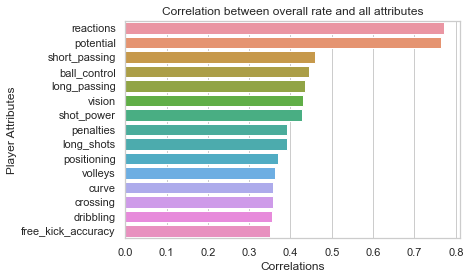

In [49]:
sns.barplot(data=corr_attribute[:15],y='player_attribute',x='corr')
plt.xlabel('Correlations')
plt.ylabel('Player Attributes')
plt.title("Correlation between overall rate and all attributes")

and this can be a 2 variable relations, between overall and all attributes to get correlation.

<a id='conclusions'></a>
## Conclusions

after that we now get at the end, with some good insights of our dataset, and with this data we can say that france league have the most unpredictable matches so it can be good to watch, and english league have also many unexpected matches and many many goals in one season, so it worth to say it's the most powerful league in the world, and in the player level we can say that reaction and potential are the most important in rating of the player.

### Limitations
this dataset has many missing values in lineup that make it hard to work with it, and some missing values in belgium league prediction.

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1